In [23]:
# Parte 04 - Seleção das melhores features(colunas)
# Autor: Marcela Rodriguez
# Data: 25/04/2023 

In [24]:
#import das bibliotecas necessarias para fazer esse tipo de analise de dados
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [41]:
#carregar a base de dados banco.csv que é relacionada a Classificação do Conjunto de Dados Bancários
#joga dentro de uma dataframe chamada data
data = pd.read_csv("banco.csv")

In [37]:
#vai exibir as 10 primeiras linhas do data frame
data.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,poutcome
0,32,4,0,6,0,0,0,0,3,3,131,5,1
1,37,10,3,6,0,0,0,0,4,3,100,1,1
2,55,5,0,5,1,2,0,0,3,2,131,2,1
3,44,2,1,0,1,0,0,1,4,3,48,2,1
4,28,0,2,3,0,0,0,0,5,0,144,2,1
5,45,10,1,2,0,0,0,0,1,0,126,3,1
6,55,0,0,6,0,0,0,0,7,0,189,1,1
7,46,0,1,3,0,0,0,1,4,3,107,3,1
8,53,1,2,2,0,2,0,0,3,4,355,1,1
9,30,0,2,6,0,0,0,0,1,1,135,1,1


In [38]:
#separaçao da base entre dados de seleção e classificação: pega todas as colunas exceto a última (do 1a col ate a 20a) e joga na variavel x
#data iloc -1: ultima coluna (price range) e joga na variavel y
X = data.iloc[:,0:20]  #independent columns
y = data.iloc[:,-1]    #target column i.e price range


In [40]:
#aplicando agora o metodo matematico e estatistico de inferência
#utiliza o metodo chi2 e pega as 10 melhores features
#apply SelectKBest class to extract top 10 best features - treinamento do modelo
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=3)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)


In [42]:
#exibindo o resultado da analise com os valores estatisticos de cada coluna, exibindo os 10 melhores
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)

featureScores.columns = ['age','job']  #naming the dataframe columns

print(featureScores.nlargest(15,'job'))  #print 10 best features

            age          job
10     duration  5059.377966
12     poutcome  1129.719250
7       contact   300.238930
8         month   138.989869
11     campaign    63.325035
4       default    54.561520
3     education    11.080160
9   day_of_week    10.935307
1           job     5.429618
0           age     4.441245
2       marital     1.866926
6          loan     1.720852
5       housing     0.230652


In [44]:
# Importância das Características do Modelo - ExtraTreesClassifier.ipynb
import pandas as pd
import numpy as np

data = pd.read_csv("banco.csv")
X = data.iloc[:,0:20]  #independent columns
y = data.iloc[:,-1]    #target column i.e price range

from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_)

#use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization



[0.00795177 0.00643439 0.00405752 0.00611783 0.00257326 0.00310537
 0.00263286 0.02575334 0.02381697 0.00574779 0.00829972 0.00590717
 0.89760201]


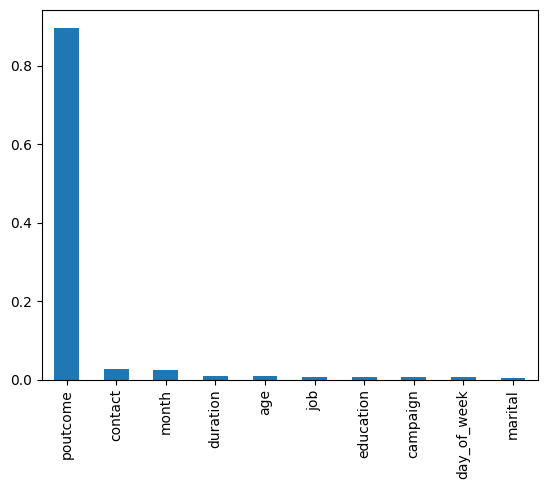

In [45]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='bar') #METODO plot imprime o grafico de resultados
plt.show()

In [47]:
# Seleção e Identificação de Melhores Features - Matriz de Correlação com LeadMAP.ipynb

In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
#import matplotlib as plt
import matplotlib.pyplot as plt

data = pd.read_csv("banco.csv")
X = data.iloc[:,0:20]  #independent columns
y = data.iloc[:,-1]    #target column i.e price range

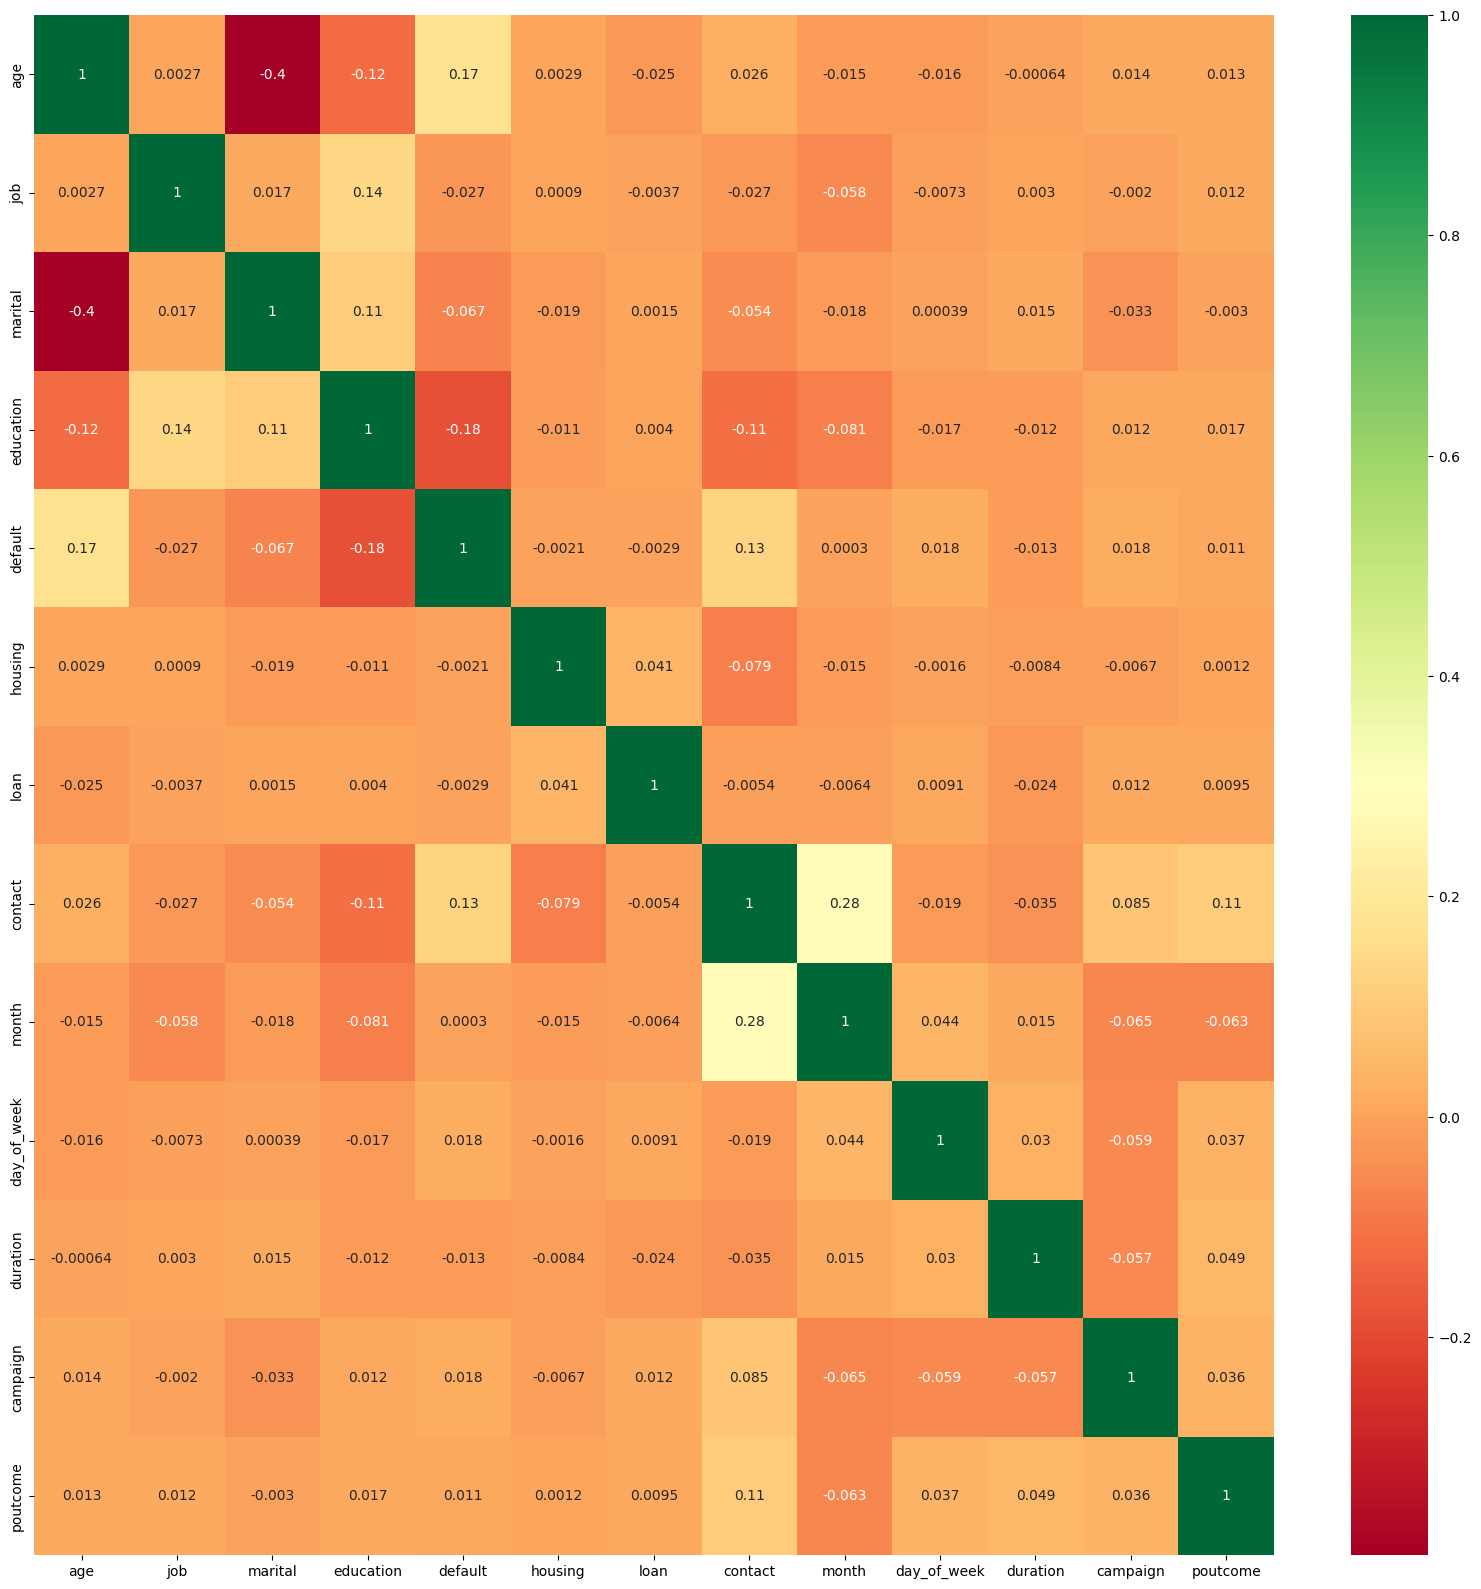

In [50]:
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))

#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")